# Compute monthly means and store to file
## Force a 50\% data basis to compute a mean value

In [1]:
import os
import glob 

import numpy as np
import xarray as xr

from sclouds.helpers   import path_input, VARIABLES
from sclouds.io.filter import Filter

%matplotlib inline

In [2]:
def get_all_filesnames_from_one_variable(var):
    """Get all filenames from one variable."""
    return glob.glob(os.path.join(path_input, '*{}*.nc'.format(var)))

In [3]:
t2m_files = get_all_filesnames_from_one_variable('t2m')

In [4]:
t2m_files[:2]

['/home/hanna/lagrings/ERA5_monthly/2012_01_t2m.nc',
 '/home/hanna/lagrings/ERA5_monthly/2013_01_t2m.nc']

In [5]:
def get_date_and_mean_from_one_filename(absolute_path = '/home/hanna/lagrings/ERA5_monthly/2012_01_t2m.nc'):
    """ Computes the mean over the entire domain, only land and only sea
    
    Parameteres
    ----------------
    absolute_path : str
        The absolute path of the file.
        
    Returns 
    ----------------
    date : np.datetime64
        Date of this monthly average
    mean_all : float
        Mean over entire domain
    mean_land : float
        Mean over land
    mean_sea : float
        mean over sea
    """
    basename = os.path.basename(absolute_path)
    date     = np.datetime64('{}-{}'.format( basename[:4], basename[5:7]))
    var      = basename[8:].split('.')[0]
    # Generating all the data and filters. 
    data     = xr.open_dataset(absolute_path) # read the data
    f_land   = Filter('land').set_data(data = data, variable = var)
    f_sea    = Filter('sea').set_data(data = data, variable = var)
    
    mean_all  = data.mean()[var].values
    mean_land = f_land.get_mean()
    mean_sea  = f_sea.get_mean()
    return date, mean_all, mean_land, mean_sea

In [6]:
a,b,c,d = get_date_and_mean_from_one_filename(absolute_path = '/home/hanna/lagrings/ERA5_monthly/2012_01_t2m.nc')

In [7]:
a,b,c,d

(numpy.datetime64('2012-01'),
 array(281.70844, dtype=float32),
 278.0635536854276,
 285.9598052625023)

In [11]:
storage = {}

In [12]:
VARIABLES

['t2m', 'sp', 'q', 'r', 'tcc']

In [18]:
for var in VARIABLES: # VARIABLES[:-1]
    
    alls  = []
    dates = []
    lands = []
    seas  = []
    
    files = get_all_filesnames_from_one_variable(var)
    for i, fil in enumerate(np.sort(files)):
        d, region, land, sea = get_date_and_mean_from_one_filename(fil)
        
        dates.append(d)
        alls.append(region)
        lands.append(land)
        seas.append(sea)
        
        if i%10 == 0:
            print('Number {}. Var {} '.format(i, var))
    
    storage[var] = alls
    storage['land_{}'.format(var)] = lands
    storage['sea_{}'.format(var)] = seas
    storage['date_{}'.format(var)] = dates # just to check that they are equal


Number 0. Var t2m 
Number 10. Var t2m 
Number 20. Var t2m 
Number 30. Var t2m 
Number 40. Var t2m 
Number 50. Var t2m 
Number 60. Var t2m 
Number 70. Var t2m 
Number 80. Var t2m 
Number 90. Var t2m 
Number 100. Var t2m 
Number 110. Var t2m 
Number 120. Var t2m 
Number 130. Var t2m 
Number 140. Var t2m 
Number 150. Var t2m 
Number 160. Var t2m 
Number 170. Var t2m 
Number 0. Var sp 
Number 10. Var sp 
Number 20. Var sp 
Number 30. Var sp 
Number 40. Var sp 
Number 50. Var sp 
Number 60. Var sp 
Number 70. Var sp 
Number 80. Var sp 
Number 90. Var sp 
Number 100. Var sp 
Number 110. Var sp 
Number 120. Var sp 
Number 130. Var sp 
Number 140. Var sp 
Number 150. Var sp 
Number 160. Var sp 
Number 170. Var sp 
Number 0. Var q 
Number 10. Var q 
Number 20. Var q 
Number 30. Var q 
Number 40. Var q 
Number 50. Var q 
Number 60. Var q 
Number 70. Var q 
Number 80. Var q 
Number 90. Var q 
Number 100. Var q 
Number 110. Var q 
Number 120. Var q 
Number 130. Var q 
Number 140. Var q 
Number 150

KeyError: 'tcc_tcc'

In [19]:
data = xr.Dataset(storage)
data.to_netcdf('/home/hanna/lagrings/results/stats/monthly_means.nc')

In [20]:
data 

<xarray.Dataset>
Dimensions:   (date_q: 180, date_r: 180, date_sp: 180, date_t2m: 180, land_q: 180, land_r: 180, land_sp: 180, land_t2m: 180, q: 180, r: 180, sea_q: 180, sea_r: 180, sea_sp: 180, sea_t2m: 180, sp: 180, t2m: 180)
Coordinates:
  * t2m       (t2m) float32 281.83633 282.70535 284.13245 ... 286.3971 283.75046
  * land_t2m  (land_t2m) float64 278.1 280.0 282.4 286.1 ... 288.8 283.5 280.1
  * sea_t2m   (sea_t2m) float64 286.2 285.8 286.1 287.4 ... 292.5 289.7 288.0
  * date_t2m  (date_t2m) datetime64[ns] 2004-01-01 2004-02-01 ... 2018-12-01
  * sp        (sp) float32 98225.94 98634.56 98678.89 ... 98291.664 98897.7
  * land_sp   (land_sp) float64 9.54e+04 9.581e+04 ... 9.566e+04 9.614e+04
  * sea_sp    (sea_sp) float64 1.015e+05 1.019e+05 ... 1.014e+05 1.021e+05
  * date_sp   (date_sp) datetime64[ns] 2004-01-01 2004-02-01 ... 2018-12-01
  * q         (q) float32 0.0052385144 0.005055673 ... 0.0070216656 0.0058911303
  * land_q    (land_q) float64 0.004256 0.004232 0.004638 ...

In [12]:
import matplotlib.pyplot as plt

/home/hanna/anaconda3/envs/tensoflow2/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


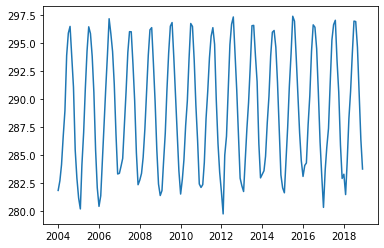

In [13]:
plt.plot(dates, vals)